# Project 1 FYS-STK4155

## Part a): Ordinary Least Square (OLS) on the Franke function

### Franke Function

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from functions import FrankeFunction, create_design_matrix

In [2]:
# Standarize the data
np.random.seed(2024)
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)

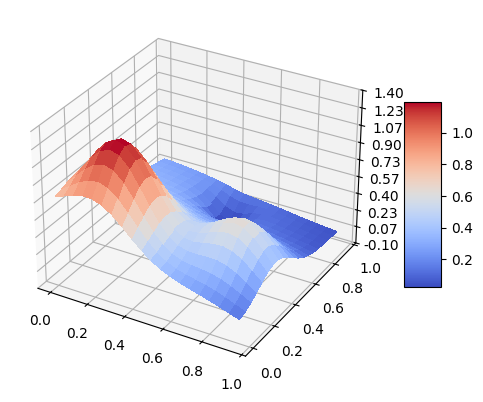

In [3]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Most off the code in the Franke function task is taken from the description in Project 1. 

### Own Code

Beta: [[ 0.73915184  0.76080404  0.77955427  0.7878897   0.77825222  0.74671292
   0.69572292  0.63297013  0.56534397  0.49496718  0.42409793  0.35917809
   0.30530353  0.26183656  0.22552085  0.19403268  0.1663644   0.14207221
   0.12081413  0.10222956]
 [ 0.916099    1.51927642  2.15743618  2.69936661  3.00811136  2.98945237
   2.62117622  1.9718144   1.23257106  0.67442005  0.45526059  0.50975424
   0.6904914   0.90702277  1.10660222  1.23420701  1.24613626  1.1341955
   0.92900587  0.68371193]
 [ 0.916099    1.51927641  2.15743618  2.69936661  3.00811135  2.98945236
   2.62117622  1.97181439  1.23257105  0.67442005  0.45526059  0.50975424
   0.6904914   0.90702277  1.10660222  1.23420701  1.24613626  1.1341955
   0.92900587  0.68371193]
 [-3.11058303 -4.6832399  -6.34268705 -7.74306274 -8.51918396 -8.40125496
  -7.27382384 -5.25696349 -2.91206278 -1.15033275 -0.47229642 -0.52941494
  -0.74546803 -0.90305708 -1.01560758 -1.0833434  -1.07322307 -0.97042463
  -0.79479753 -0.587825  ]


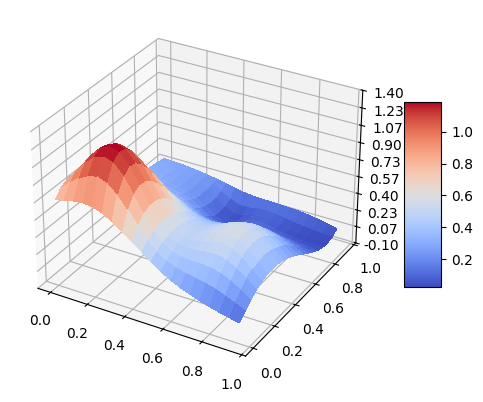

In [4]:
import numpy as np

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
xv, yv = np.meshgrid(x, y)
z = FrankeFunction(xv, yv)

# Polynomial degree
degree = 4

# Creating design matrix
X = create_design_matrix(x, y, degree)

#Adding a regresion term to avoid a singular matrix.
reg_term = 1e-6
OLSbeta = np.linalg.inv(X.T @ X + reg_term*np.eye(X.shape[1])) @ X.T @ z

ztilde = X @ OLSbeta

mse = np.mean((z - ztilde)**2)
R2 = 1 - np.sum((z - ztilde)**2) / np.sum((z - np.mean(z))**2)

print(f"Beta: {OLSbeta}")
print(f"Mse: {mse}")
print(f"R2: {R2}")


fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(xv, yv, ztilde, cmap=cm.coolwarm,
linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [11]:
import matplotlib.pyplot as plt

# Polynomial degrees
degrees = np.arange(0, 5)

# Empty lists to store scores and parameters
beta_values = []
mse_scores = []
r2_scores = []

# Looping through each degree
for degree in degrees:
    # Creating design matrix
    X = create_design_matrix(x, y, degree)
    
    # Calculating OLS beta
    OLSbeta = np.linalg.inv(X.T.dot(X)+ reg_term*np.eye(X.shape[1])) @ X.T @ z
    
    # Calculating ztilde
    ztilde = X @ OLSbeta
    
    # Calculating MSE and R2
    mse = np.mean((z - ztilde)**2)
    r2 = 1 - np.sum((z - ztilde)**2) / np.sum((z - np.mean(z))**2)
    
    # Appending beta values and scores
    beta_values.append(OLSbeta)
    mse_scores.append(mse)
    r2_scores.append(r2)


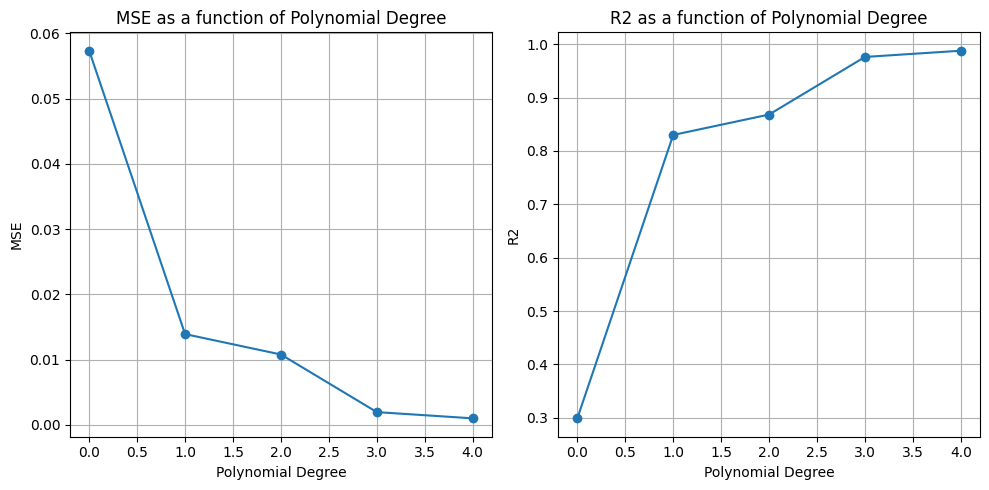

In [12]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree')
plt.grid()

plt.tight_layout()
plt.show()

We can see that the mean squared error drops 0.375-0.025 = 0.35, which is 93.33 %, when the polynomial order is increased from 2 to 3. The R2 score indicated the exact same improvement as a little over 75% of the outcome is predicted by the model when the polynomial order is increased from 2 to 3.

ValueError: x and y must have same first dimension, but have shapes (1,) and (20,)

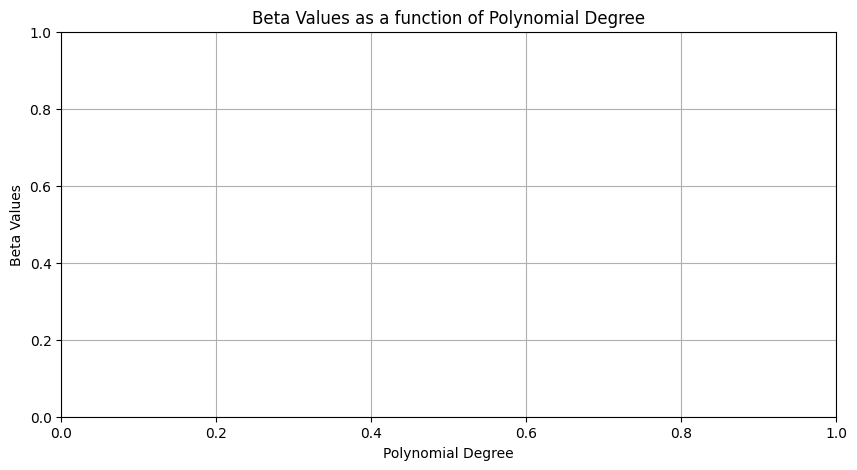

In [7]:
plt.figure(figsize=(10, 5))
plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta Values as a function of Polynomial Degree')
plt.grid()

colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each degree

for i in range(len(beta_values)):
    for j in range(len(beta_values[i])):
        beta_i = beta_values[i][j] 
        # Plot each beta value with a different color
        plt.plot(degrees[i], beta_i, marker='o', color=colors[i])

plt.tight_layout()
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Degree = {degrees[i]}', markerfacecolor=colors[i], markersize=8) for i in range(len(degrees))])
plt.show()


A bit unsure how to plot the beta values as there are linearly increasing values with polynomial order. Note that where the number of beta values does not equal the number of polynomial order, there are beta values that are the same.

We can see that the amount of unique betas increase with higher polynomial order. The unique betas seems to be more negative when the polynomial order is increased. The beta values are also more spread out when the polynomial order is increased for this particular dataset. This is reasonable as increasing the polynomial order will increase the complexity of the model, and the model will be able to fit the data better.

### Including Scaling and Centering of the data 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(2024)
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
z = FrankeFunction(x, y)

X = create_design_matrix(x, y, degree)

# Split the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Scale and center the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Copilotes thoughts on scaling and centering of the data: 

"Scaling the data is important for several reasons:

Normalization: Scaling the data brings all features to a similar scale, typically centered around zero. This is important because many machine learning algorithms assume that the features are normally distributed with zero mean and unit variance. If the features have different scales, it can lead to biased models and incorrect interpretations of feature importance.

Outlier Sensitivity: Scaling helps in reducing the impact of outliers on the model. Outliers can have a disproportionate effect on the mean and variance of a feature, making it difficult for the model to learn patterns from the majority of the data. Scaling mitigates this issue by bringing the data within a similar range, making it less sensitive to outliers.

Convergence Speed: Scaling can improve the convergence speed of optimization algorithms. When features have different scales, the optimization process may take longer to find the optimal solution. Scaling the data helps in achieving faster convergence and more efficient training.

However, there are cases where scaling may not be necessary or even detrimental:

Domain Knowledge: In some cases, domain knowledge may suggest that scaling is not required. For example, if the features already have a similar scale and there is no reason to believe that scaling would improve the model's performance, then scaling may be unnecessary.

Sparse Data: Scaling sparse data can be challenging because it may break the sparsity structure and result in a dense matrix. In the provided code, there is a check to avoid centering sparse matrices. This is because centering sparse matrices would require building a dense matrix, which may not be feasible for large datasets. In such cases, it is recommended to pass with_mean=False to the StandardScaler constructor to avoid centering.

Interpretability: Scaling can sometimes make it harder to interpret the model's coefficients or feature importance. If interpretability is a priority and the scale of the features is meaningful in the context of the problem, then scaling may not be desirable."